In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = '.\\transaction-data-adhoc-analysis.json'

transaction_df = pd.read_json(data_path)

# split transaction_items to brand, item, and quantity
transaction_df.transaction_items = transaction_df.transaction_items.str.split(';')                                                               
new_df=transaction_df.explode('transaction_items')
new_df[['brand', 
        'item', 
        'quantity']] = new_df['transaction_items'].str.split(',', expand=True)
new_df[['brand', 
        'item', 
        'quantity',
        'transaction_value']].dropna()
new_df['quantity'] = new_df['quantity'].str.extract('(\d+)', expand=False)
new_df['quantity'] = new_df['quantity'].astype(str).astype(int)

# get transactions that purchased 1 type of item
check_items_df = new_df[['transaction_items',
                         'transaction_value']].copy()
check_items_df = check_items_df[~check_items_df.index.duplicated(keep=False)]
check_items_df[['brand', 
                'item', 
                'quantity']] = check_items_df['transaction_items'].str.split(',', 
                                                                             expand=True)
check_items_df[['brand', 
                'item', 
                'quantity',
                'transaction_value']].dropna()
check_items_df['quantity'] = check_items_df['quantity'].str.extract('(\d+)', 
                                                                    expand=False)

# delete item duplicates
check_items_df = check_items_df.drop_duplicates(subset='item', 
                                                keep='first', 
                                                inplace=False)
check_items_df['quantity'] = check_items_df['quantity'].astype(str).astype(int)

# get unit_price of each item
check_items_df['unit_price'] = check_items_df['transaction_value'] / check_items_df['quantity']
check_items_df['unit_price'] = check_items_df['unit_price'].astype(int)

# add column unit_price to organized_transaction_df
# use map to match item from organized_transaction_df to its corresponding price
unit_price_dict = (check_items_df.set_index('item')['unit_price'].to_dict())
new_df['unit_price'] = new_df['item'].map(unit_price_dict)
new_df['transaction_value_per_row'] = new_df['quantity'] * new_df['unit_price']
organized_transaction_df = new_df.copy()
organized_transaction_df.pop('transaction_items')
organized_transaction_df.pop('transaction_value')

# convert birthdate and transaction_date type object to type datetime
organized_transaction_df['birthdate'] =  pd.to_datetime(organized_transaction_df['birthdate'])
organized_transaction_df['transaction_date'] =  pd.to_datetime(organized_transaction_df['transaction_date'])

# Copy necessary columns from organized_transaction_df for pivot table 1
pivot1_df = organized_transaction_df[['transaction_date', 
                                      'item', 
                                      'quantity']].copy()
pivot1_df['transaction_month'] = pd.DatetimeIndex(pivot1_df['transaction_date']).month.astype('string') + ' - ' + pivot1_df['transaction_date'].dt.month_name().astype('string')
pivot1_df.pop('transaction_date')
pivot1_df.rename(columns = {'item':'Item'}, inplace = True)
pivot1_df.rename(columns = {'transaction_month':'Transaction Month'}, inplace = True)

# Copy necessary columns from organized_transaction_df for pivot table 2
pivot2_df = organized_transaction_df[['transaction_date', 
                                      'item', 
                                      'transaction_value_per_row']].copy()
pivot2_df['transaction_month'] = pd.DatetimeIndex(pivot2_df['transaction_date']).month.astype('string') + ' - ' + pivot2_df['transaction_date'].dt.month_name().astype('string')
pivot2_df.pop('transaction_date')
pivot2_df.rename(columns = {'item':'Item'}, inplace = True)
pivot2_df.rename(columns = {'transaction_month':'Transaction Month'}, inplace = True)
pivot2_df['transaction_value_per_row']=(pivot2_df['transaction_value_per_row'])/1000000

#create data frame that shows the customer name in the corresponding transaction month/s
customer_df = transaction_df[['name','transaction_date']].copy()
customer_df['transaction_month'] = pd.DatetimeIndex(customer_df['transaction_date']).month
customer_df.pop('transaction_date')
customer_df ['1 - January'] = customer_df.query('transaction_month==1')['name']
customer_df ['2 - February'] = customer_df.query('transaction_month==2')['name']
customer_df ['3 - March'] = customer_df.query('transaction_month==3')['name']
customer_df ['4 - April'] = customer_df.query('transaction_month==4')['name']
customer_df ['5 - May'] = customer_df.query('transaction_month==5')['name']
customer_df ['6 - June'] = customer_df.query('transaction_month==6')['name']
customer_df ['7 - July'] = customer_df.query('transaction_month==7')['name']
customer_df ['8 - August'] = customer_df.query('transaction_month==8')['name']
customer_df ['9 - September'] = customer_df.query('transaction_month==9')['name']
customer_df ['10 - October'] = customer_df.query('transaction_month==10')['name']
customer_df ['11 - November'] = customer_df.query('transaction_month==11')['name']
customer_df ['12 - December'] = customer_df.query('transaction_month==12')['name']
customer_df.pop('transaction_month')
customer_df.pop('name')
customer_df = customer_df.drop_duplicates(keep='first', inplace=False)

# create list of months in the transaction data
# this is done to show only months in the transaction data in tables and charts
transaction_months_list = pivot2_df['Transaction Month'].copy()
transaction_months_list = transaction_months_list.drop_duplicates(keep='first', inplace=False)
transaction_months_list = transaction_months_list.tolist()

# remove NaN from table and shift values up
customer_df1 = customer_df.apply(lambda x: pd.Series(x.dropna().values)).fillna('')

# customer_df1 columns to lists
jan_list = customer_df1['1 - January'].tolist()
feb_list = customer_df1['2 - February'].tolist()
mar_list = customer_df1['3 - March'].tolist()
apr_list = customer_df1['4 - April'].tolist()
may_list = customer_df1['5 - May'].tolist()
jun_list = customer_df1['6 - June'].tolist()
jul_list = customer_df1['7 - July'].tolist()
aug_list = customer_df1['8 - August'].tolist()
sep_list = customer_df1['9 - September'].tolist()
oct_list = customer_df1['10 - October'].tolist()
nov_list = customer_df1['11 - November'].tolist()
dec_list = customer_df1['12 - December'].tolist()

# delete empty strings for converted lists
jan_list = list(filter(None, jan_list))
feb_list = list(filter(None, feb_list))
mar_list = list(filter(None, mar_list))
apr_list = list(filter(None, apr_list))
may_list = list(filter(None, may_list))
jun_list = list(filter(None, jun_list))
jul_list = list(filter(None, jul_list))
aug_list = list(filter(None, aug_list))
sep_list = list(filter(None, sep_list))
oct_list = list(filter(None, oct_list))
nov_list = list(filter(None, nov_list))
dec_list = list(filter(None, dec_list))
months_list=[jan_list,feb_list,mar_list,apr_list,
             may_list,jun_list,jul_list,aug_list,
             sep_list,oct_list,nov_list,dec_list]

# customer of previous month/s
jan2 = list(set())
feb2 = list(set(jan_list))
mar2 = list(set(jan_list + feb_list))
apr2 = list(set(jan_list + feb_list + mar_list))
may2 = list(set(jan_list + feb_list + mar_list + apr_list))
jun2 = list(set(jan_list + feb_list + mar_list + apr_list + may_list))
jul2 = list(set(jan_list + feb_list + mar_list + apr_list + may_list + jun_list))
aug2 = list(set(jan_list + feb_list + mar_list + apr_list + may_list + jun_list + 
                jul_list))
sep2 = list(set(jan_list + feb_list + mar_list + apr_list + may_list + jun_list + 
                jul_list + aug_list))
oct2 = list(set(jan_list + feb_list + mar_list + apr_list + may_list + jun_list + 
                jul_list + aug_list + sep_list))
nov2 = list(set(jan_list + feb_list + mar_list + apr_list + may_list + jun_list + 
                jul_list + aug_list + sep_list + oct_list))
dec2 = list(set(jan_list + feb_list + mar_list + apr_list + may_list + jun_list + 
                jul_list + aug_list + sep_list + oct_list + nov_list))

# repeater
jan_repeater = (customer_df1[customer_df1['1 - January'].isin(jan2)].count())[0]
feb_repeater = (customer_df1[customer_df1['2 - February'].isin(jan_list)].count())[0]
mar_repeater = (customer_df1[customer_df1['3 - March'].isin(feb_list)].count())[0]
apr_repeater = (customer_df1[customer_df1['4 - April'].isin(mar_list)].count())[0]
may_repeater = (customer_df1[customer_df1['5 - May'].isin(apr_list)].count())[0]
jun_repeater = (customer_df1[customer_df1['6 - June'].isin(may_list)].count())[0]
jul_repeater = (customer_df1[customer_df1['7 - July'].isin(jun_list)].count())[0]
aug_repeater = (customer_df1[customer_df1['8 - August'].isin(jul_list)].count())[0]
sep_repeater = (customer_df1[customer_df1['9 - September'].isin(aug_list)].count())[0]
oct_repeater = (customer_df1[customer_df1['10 - October'].isin(sep_list)].count())[0]
nov_repeater = (customer_df1[customer_df1['11 - November'].isin(oct_list)].count())[0]
dec_repeater = (customer_df1[customer_df1['12 - December'].isin(nov_list)].count())[0]

# inactive
jan_inactive = len(list(set(jan2).difference(jan_list)))
feb_inactive = len(list(set(feb2).difference(feb_list)))
mar_inactive = len(list(set(mar2).difference(mar_list)))
apr_inactive = len(list(set(apr2).difference(apr_list)))
may_inactive = len(list(set(may2).difference(may_list)))
jun_inactive = len(list(set(jun2).difference(jun_list)))
jul_inactive = len(list(set(jul2).difference(jul_list)))
aug_inactive = len(list(set(aug2).difference(aug_list)))
sep_inactive = len(list(set(sep2).difference(sep_list)))
oct_inactive = len(list(set(oct2).difference(oct_list)))
nov_inactive = len(list(set(nov2).difference(nov_list)))
dec_inactive = len(list(set(dec2).difference(dec_list)))

#engaged
jan_engaged = (customer_df1[customer_df1['1 - January'].isin(jan_list)].count())[0]
feb_engaged = (customer_df1[customer_df1['2 - February'].isin(feb2)].count())[0]
mar_engaged = (customer_df1[customer_df1['3 - March'].isin(mar2)].count())[0]
apr_engaged = (customer_df1[customer_df1['4 - April'].isin(apr2)].count())[0]
may_engaged = (customer_df1[customer_df1['5 - May'].isin(may2)].count())[0]
jun_engaged = (customer_df1[customer_df1['6 - June'].isin(jun2)].count())[0]
jul_engaged = (customer_df1[customer_df1['7 - July'].isin(jul2)].count())[0]
aug_engaged = (customer_df1[customer_df1['8 - August'].isin(aug2)].count())[0]
sep_engaged = (customer_df1[customer_df1['9 - September'].isin(sep2)].count())[0]
oct_engaged = (customer_df1[customer_df1['10 - October'].isin(oct2)].count())[0]
nov_engaged = (customer_df1[customer_df1['11 - November'].isin(nov2)].count())[0]
dec_engaged = (customer_df1[customer_df1['12 - December'].isin(dec2)].count())[0]

# data for 'Repeater, Inactive, Engaged' table
customer_status = {'1 - January':[jan_repeater,jan_inactive,jan_engaged],
                   '2 - February':[feb_repeater,feb_inactive,feb_engaged],
                   '3 - March':[mar_repeater,mar_inactive,mar_engaged],
                   '4 - April':[apr_repeater,apr_inactive,apr_engaged],
                   '5 - May':[may_repeater,may_inactive,may_engaged],
                   '6 - June':[jun_repeater,jun_inactive,jun_engaged],
                   '7 - July':[jul_repeater,jul_inactive,jul_engaged],
                   '8 - August':[aug_repeater,aug_inactive,aug_engaged],
                   '9 - September':[sep_repeater,sep_inactive,sep_engaged],
                   '10 - October':[oct_repeater,oct_inactive,oct_engaged],
                   '11 - November':[nov_repeater,nov_inactive,nov_engaged],
                   '12 - December':[dec_repeater,dec_inactive,dec_engaged]}

# Additional activity metrics 1
pivot3_df = organized_transaction_df[['sex', 
                                      'item', 
                                      'quantity']].copy()
pivot3_df["sex"] = pivot3_df["sex"].replace({'M':'Male', 'F':'Female'})
pivot3_df.rename(columns = {'item':'Item'}, inplace = True)
pivot3_df.rename(columns = {'sex':'Sex'}, inplace = True)

# Additional activity metrics 2
age_df = organized_transaction_df[['name','birthdate','transaction_date']].copy()
age_df['age'] = (organized_transaction_df['transaction_date'] - organized_transaction_df['birthdate']).astype(str)
age_df = age_df.drop_duplicates(subset='name', keep='first', inplace=False)
age_df['age'] = age_df['age'].str.extract('(\d+)', expand=False)
age_df['age'] = age_df['age'].astype('int')/365.25
bins= [0,10,20,30,40,50,60,70,80,500]
age_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+']
age_df['age_range'] = pd.cut(age_df['age'], bins=bins, labels=age_labels, right=False)
age_df.pop('age')
age_df.pop('birthdate')
age_df.pop('transaction_date')
age_df.rename(columns = {'name':'Customers'}, inplace = True)
age_df.rename(columns = {'age_range':'Age Range'}, inplace = True)
age_df2 = age_df.groupby('Age Range').count()

# Additional activity metrics 3
sex_df = organized_transaction_df[['name','sex']].copy()
sex_df = sex_df.drop_duplicates(subset='name', keep='first', inplace=False)
sex_df["sex"] = sex_df["sex"].replace({'M':'Male', 'F':'Female'})
sex_df.rename(columns = {'sex':'Sex'}, inplace = True)
sex_df.rename(columns = {'name':'Customers'}, inplace = True)
sex_labels = ['Female','Male']
sex_df2 = sex_df.groupby('Sex').count()

In [2]:
# display transaction table presented in a granularity of one transaction per row
print('Transaction table presented in a granularity of one transaction per row:')
organized_transaction_df

Transaction table presented in a granularity of one transaction per row:


,address,birthdate,mail,name,sex,username,transaction_date,brand,item,quantity,unit_price,transaction_value_per_row
0,USNS Wagner\nFPO AE 00917,1926-03-11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,2022-01-12,Exotic Extras,Beef Chicharon,4,1299,5196
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,2022-01-12,Exotic Extras,Beef Chicharon,3,1299,3897
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,2022-01-12,HealthyKid 3+,Nutrional Milk,4,1990,7960
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,2022-01-12,Candy City,Orange Beans,1,199,199
2,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,2022-01-08,HealthyKid 3+,Gummy Vitamins,3,1500,4500
...,...,...,...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,2022-06-09,HealthyKid 3+,Nutrional Milk,2,1990,3980
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,2022-06-09,Candy City,Gummy Worms,2,150,300
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012-04-30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2022-06-03,HealthyKid 3+,Nutrional Milk,1,1990,1990
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012-04-30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2022-06-03,Candy City,Gummy Worms,3,150,450


In [3]:
# Breakdown of the count of each item sold per month
print('Breakdown of the count of each item sold per month:')
pivot1 = pivot1_df.pivot_table(values='quantity',
                               index='Item', 
                               columns='Transaction Month', 
                               aggfunc='sum')
pivot1

Breakdown of the count of each item sold per month:


Transaction Month,1 - January,2 - February,3 - March,4 - April,5 - May,6 - June
Item,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902
Gummy Vitamins,9681,9980,10145,9842,9948,9980
Gummy Worms,9559,9996,9986,10043,9801,9934
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104
Nutrional Milk,9727,9691,9876,9786,9881,9767
Orange Beans,9774,10037,9611,9914,9964,10106
Yummy Vegetables,9959,10256,9896,9861,9735,9722


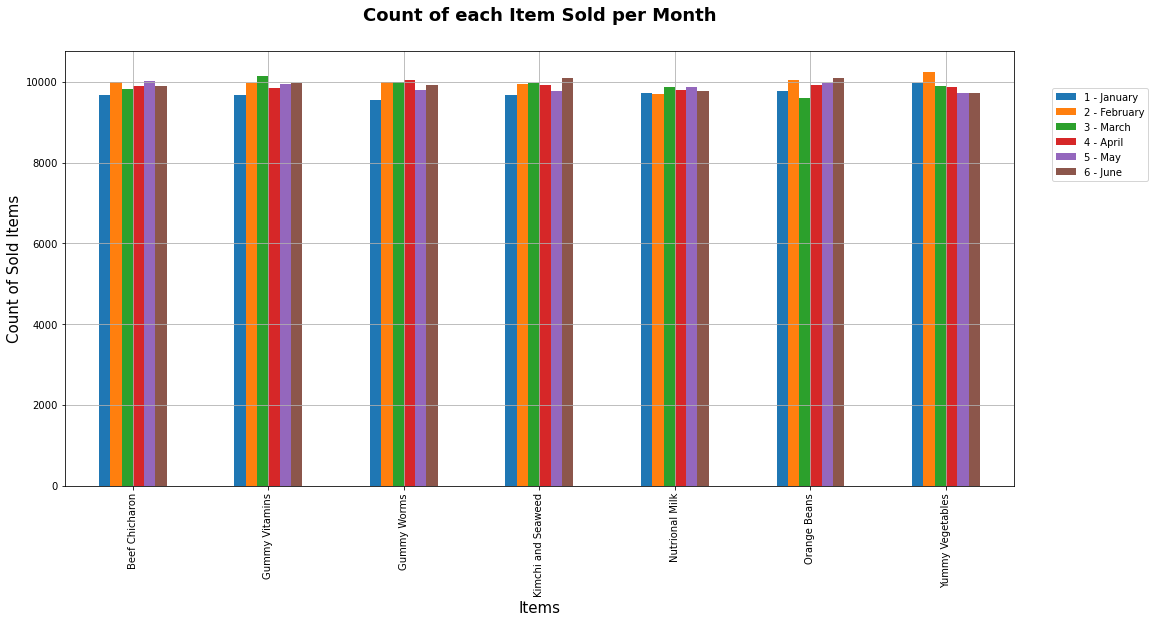

In [4]:
# Count of each Item Sold per Month
ax1 = pivot1.plot(kind="bar")
fig1 = ax1.get_figure()
fig1.set_size_inches(17, 8)
ax1.set_title('Count of each Item Sold per Month',fontweight="bold", size=18, pad=30)
ax1.set_xlabel('Items', fontsize = 15)
ax1.set_ylabel('Count of Sold Items', fontsize = 15)
ax1.legend(loc=(1.04,0.7))
ax1.grid()
plt.show()

In [5]:
# Breakdown of the total sale value in millions per item per month
print('Breakdown of the total sale value in millions per item per month:')
pivot2 = pivot2_df.pivot_table(values='transaction_value_per_row', 
                               index='Item', 
                               columns='Transaction Month', 
                               aggfunc='sum')
pivot2

Breakdown of the total sale value in millions per item per month:


Transaction Month,1 - January,2 - February,3 - March,4 - April,5 - May,6 - June
Item,,,,,,
Beef Chicharon,12.554835,12.991299,12.750984,12.847110,13.026372,12.862698
Gummy Vitamins,14.521500,14.970000,15.217500,14.763000,14.922000,14.970000
Gummy Worms,1.433850,1.499400,1.497900,1.506450,1.470150,1.490100
Kimchi and Seaweed,7.731124,7.949251,7.963633,7.926879,7.808627,8.073096
Nutrional Milk,19.356730,19.285090,19.653240,19.474140,19.663190,19.436330
Orange Beans,1.945026,1.997363,1.912589,1.972886,1.982836,2.011094
Yummy Vegetables,4.979500,5.128000,4.948000,4.930500,4.867500,4.861000


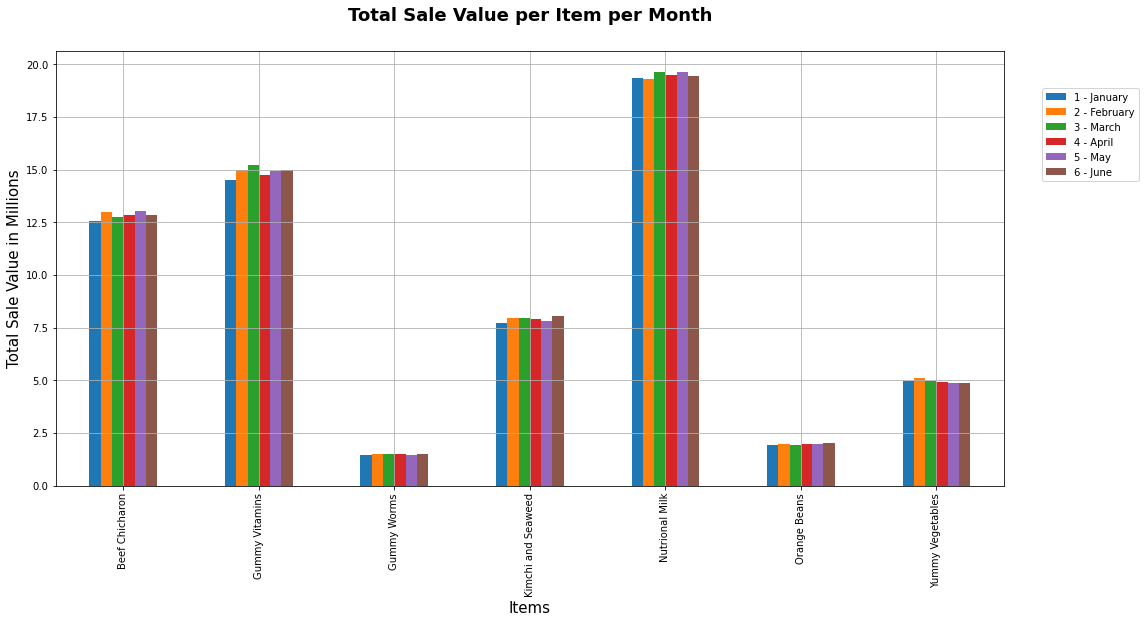

In [6]:
# Total Sale Value per Item per Month
ax2 = pivot2.plot(kind="bar")
fig2 = ax2.get_figure()
fig2.set_size_inches(17, 8)
ax2.set_title('Total Sale Value per Item per Month',fontweight="bold", size=18, pad=30)
ax2.set_xlabel('Items', fontsize = 15)
ax2.set_ylabel('Total Sale Value in Millions', fontsize = 15)
ax2.legend(loc=(1.04,0.7))
ax2.grid()
plt.show()

In [7]:
# 'Repeater, Inactive, Engaged' Table
r_i_e_df = pd.DataFrame(customer_status, index=['Repeater','Inactive','Engaged'])
r_i_e_df[transaction_months_list]

,1 - January,2 - February,3 - March,4 - April,5 - May,6 - June
Repeater,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,5172,6300,6460,6548,6650


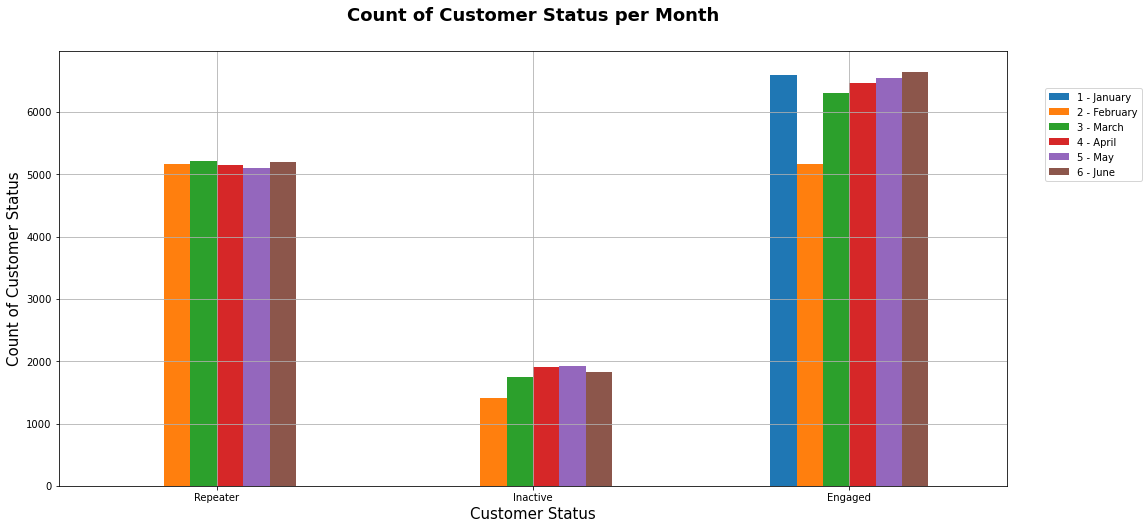

In [8]:
# Count of Customer Status per Month
ax4 = r_i_e_df[transaction_months_list].plot(kind="bar")
fig4 = ax4.get_figure()
fig4.set_size_inches(17, 8)
ax4.set_title('Count of Customer Status per Month',fontweight="bold", size=18, pad=30)
ax4.set_xlabel('Customer Status', fontsize = 15)
ax4.set_ylabel('Count of Customer Status', fontsize = 15)
ax4.tick_params(labelrotation=0)
ax4.legend(loc=(1.04,0.7))
ax4.grid()
plt.show()

In [9]:
# Breakdown of the count of each item sold per customer sex
print('Breakdown of the count of each item sold per customer sex:')
pivot3 = pivot3_df.pivot_table(values='quantity',
                               index='Item', 
                               columns='Sex', 
                               aggfunc='sum')
pivot3

Breakdown of the count of each item sold per customer sex:


Sex,Female,Male
Item,,
Beef Chicharon,29438,29864
Gummy Vitamins,29292,30284
Gummy Worms,29486,29833
Kimchi and Seaweed,29587,29803
Nutrional Milk,29001,29727
Orange Beans,29650,29756
Yummy Vegetables,29528,29901


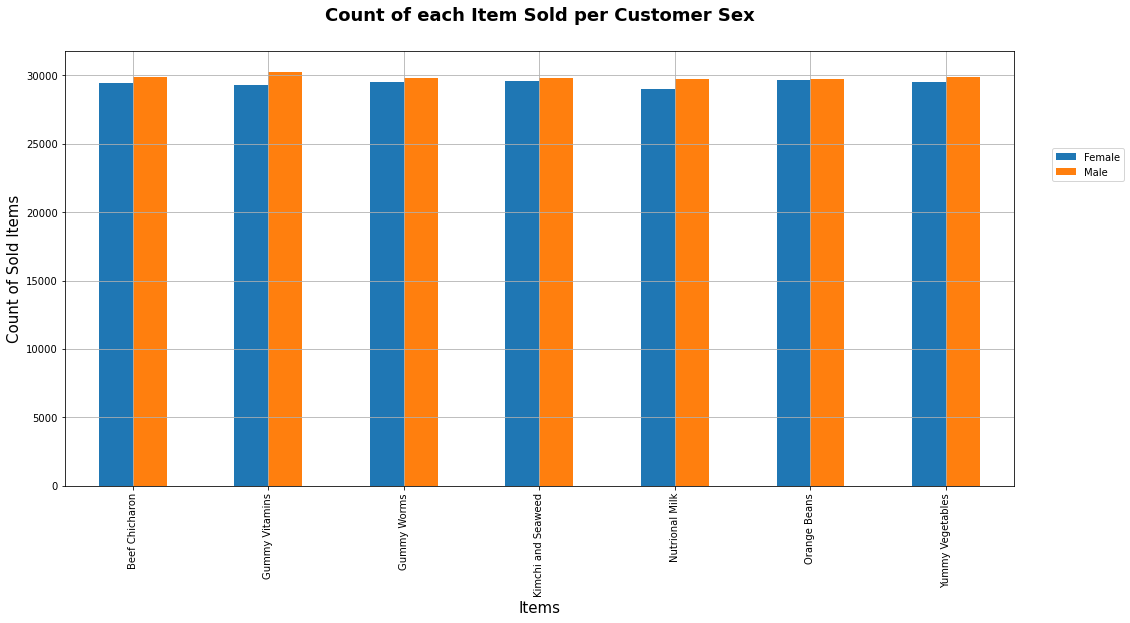

In [10]:
# Count of each Item Sold per Customer Sex
ax3 = pivot3.plot(kind="bar")
fig3 = ax3.get_figure()
fig3.set_size_inches(17, 8)
ax3.set_title('Count of each Item Sold per Customer Sex',fontweight="bold", size=18, pad=30)
ax3.set_xlabel('Items', fontsize = 15)
ax3.set_ylabel('Count of Sold Items', fontsize = 15)
ax3.legend(loc=(1.04,0.7))
ax3.grid()
plt.show()

In [11]:
# Count of Customers per Age Range
print('Count of Customers per Age Range:')
age_df2

Count of Customers per Age Range:


,Customers
Age Range,
0-9,779
10-19,736
20-29,717
30-39,731
40-49,731
50-59,694
60-69,700
70-79,738
80+,2661


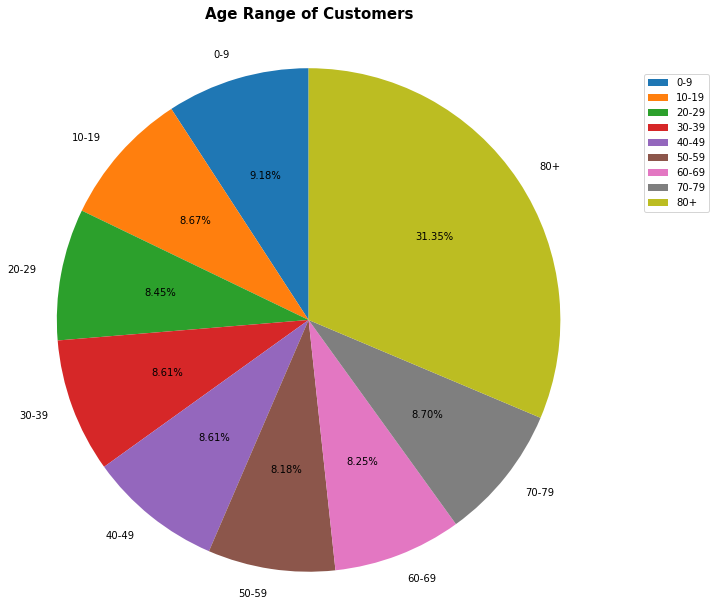

In [15]:
# Age Range of Customers
plt.pie(age_df2['Customers'], 
        labels = age_labels,
        autopct='%1.2f%%', 
        startangle=90)
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Age Range of Customers',fontweight='bold',fontsize=15,pad=30)
plt.legend(age_labels, loc=(1.1,0.7))
plt.axis('equal')
plt.show()

In [13]:
# Count of Customers per Sex
print('Count of Customers per Sex:')
sex_df2

Count of Customers per Sex:


,Customers
Sex,
Female,4278
Male,4209


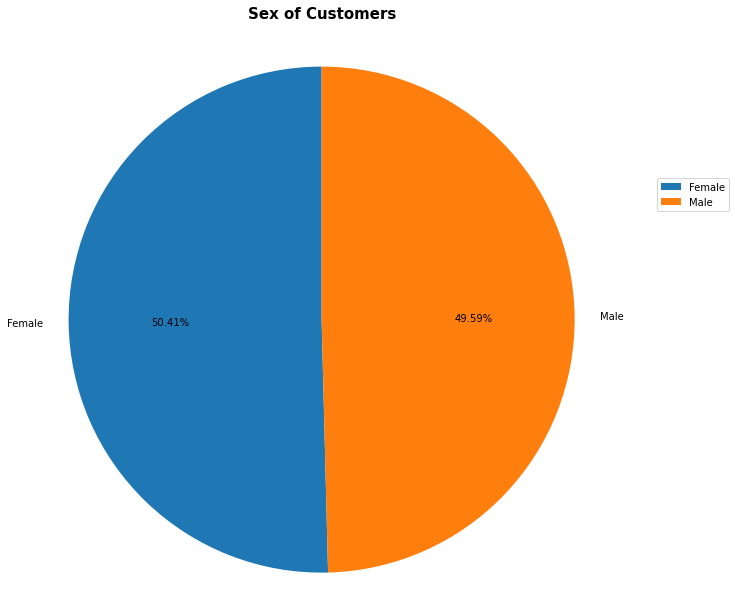

In [14]:
# Sex of Customers
plt.pie(sex_df2['Customers'], 
        labels = sex_labels,
        autopct='%1.2f%%', 
        startangle=90)
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Sex of Customers',fontweight='bold',fontsize=15,pad=30)
plt.legend(sex_labels, loc=(1.1,0.7))
plt.axis('equal')
plt.show()